In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Crop_recommendation.csv')
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
factors= pd.pivot_table(df,index = ['label'], aggfunc= 'median')
factors

K      N      P   humidity        ph    rainfall  temperature
label                                                                         
apple        200.0   24.0  136.5  92.416541  5.885818  112.979230    22.628290
banana        50.0  100.5   81.0  80.223599  5.994462  105.007750    27.443333
blackgram     19.0   41.0   67.0  65.026723  7.165240   68.293539    29.655515
chickpea      79.0   39.0   68.0  16.658634  7.356537   79.692282    18.878291
coconut       31.0   24.0   15.5  94.960581  5.990709  171.999922    27.385317
coffee        30.0  103.0   29.0  57.648083  6.798626  157.770963    25.656643
cotton        19.0  117.0   46.0  80.010893  6.840957   80.237095    23.964997
grapes       201.0   24.0  133.0  81.724647  6.001785   69.536186    23.018528
jute          40.0   78.0   46.0  79.469205  6.711500  175.590814    24.971106
kidneybeans   20.0   22.0   67.0  21.348735  5.745283  107.399392    19.924037
lentil        19.0   16.5   68.0  64.094626  6.954178   46.553255    24.946835
maize         20.0   76.0   48.5  65.303845  6.259181   83.471553    22.844456
mango         30.0   21.0   27.5  50.281615  5.743385   94.905973    31.300223
mothbeans     20.0   22.0   48.5  53.668190  7.219136   51.182738    28.370863
mungbean      20.0   22.0   47.0  85.953767  6.703890   49.028171    28.441673
muskmelon     50.0  100.0   18.0  92.111116  6.353033   24.721512    28.851775
orange        10.0   19.0   16.0  91.963246  7.022614  110.684073    22.901055
papaya        50.0   49.0   60.0  92.681086  6.740830  139.000698    33.262870
pigeonpeas    20.0   20.0   69.5  47.195180  5.690466  154.310507    28.931707
pomegranate   40.0   18.0   20.0  89.911979  6.430715  107.588201    22.354425
rice          40.0   80.0   47.0  82.189357  6.363804  233.119859    23.734837
watermelon    50.5   99.0   17.5  85.030605  6.469926   50.671903    25.603965

In [8]:
df.corr()

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

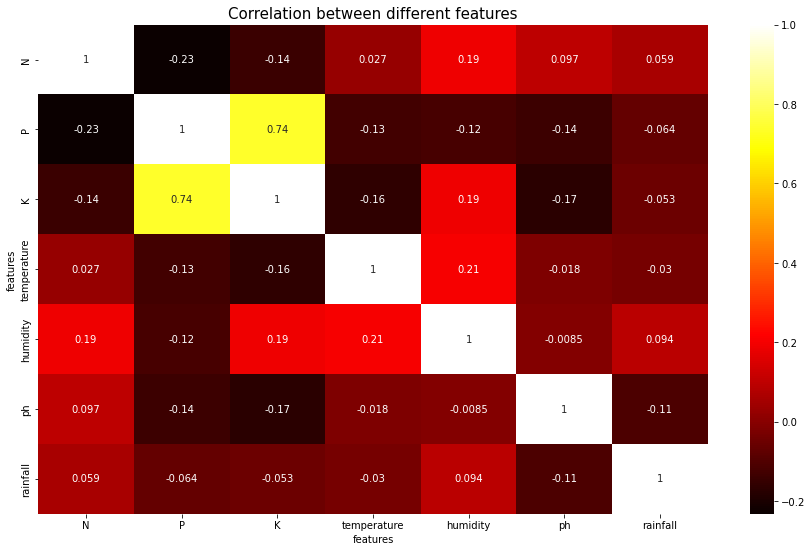

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True,cmap='hot')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [10]:
from sklearn.metrics import classification_report


In [11]:
X = df.drop('label', axis=1)
y = df['label']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    shuffle = True, random_state = 0)

In [13]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
y_pred=classifier.predict(X_test)

In [16]:

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print(accuracy*100)

Decision Tree Model accuracy score: 0.9909
99.0909090909091


In [17]:
crop=['wheat','mungbean','Tea','millet','maize','lentil','jute','coffee','cotton','ground nut','peas','rubber','sugarcane','tobacco','kidney beans','moth beans','coconut','blackgram','adzuki beans','pigeon peas','chick peas','banana','grapes','apple','mango','muskmelon','orange','papaya','watermelon','pomegranate']
cr='rice'

In [18]:
import pandas as pd
import pickle


dict={   0:'rice',
         1: 'maize',
         2: 'chickpea',
         3: 'kidneybeans',
         4: 'pigeonpeas',
         5: 'mothbeans',
         6: 'mungbean',
         7: 'blackgram',
         8: 'lentil',
         9: 'pomegranate',
        10: 'banana',
        11: 'mango0',
        12: 'grapes',
        13: 'watermelon',
        14: 'muskmelon',
        15: 'apple',
        16: 'orange',
        17: 'papaya',
        18: 'coconut',
        19: 'cotton',
        20: 'jute',
        21: 'coffee'
     }

with open('dict.pkl', 'wb') as ctid:
    pickle.dump(dict,ctid)


file_name="Crop_recommendation.pkl"
data = np.random.randn(2200, 7)
# pd.set_option('display.max_rows', None)
df = pd.DataFrame(data=data, columns=['N','P','K','temperature','humidity','ph','rainfall'])
print(df)
df.to_pickle(file_name)

file_name="Crop_recommendation.pkl"
df2 = pd.read_pickle(file_name)

from flask import Flask, redirect, request, url_for, render_template
import numpy as np

app= Flask(__name__)

model=pickle.load(open('Crop_recommendation.pkl','rb'))

@app.route("/")
def home():
  return render_template("index.html")

  
@app.route('/predict',methods=['POST','GET'])
def predict():
  N = request.form.get('N')
  P = request.form.get('P')
  K = request.form.get('K')

  temperature = request.form.get('temperature')
  humidity = request.form.get('humidity')
  ph = request.form.get('ph')
  rainfall = request.form.get('rainfall')

  input_query = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
  result = model.predict(input_query)[0]

  return jsonify({'crop':(result)})

if __name__ == '_main_':
    app.run(debug=True)

             N         P         K  temperature  humidity        ph  rainfall
0     1.463415 -0.823125 -0.804047     0.323766  0.491650  0.009760  1.311986
1     1.188491 -1.858646  2.025554    -2.527012 -1.013640  0.989738  1.218312
2     0.889817  0.637558  1.336834     0.918276  0.513353 -0.907618 -0.907068
3     0.315056 -2.218594  1.350384     0.177755 -0.817083  0.243550 -0.552083
4    -0.924871 -0.886811 -1.232310     0.895711  1.334535 -0.882766  1.164343
...        ...       ...       ...          ...       ...       ...       ...
2195  0.097041 -0.614114 -2.378371     0.246191  0.576436 -0.418338  1.455923
2196  1.220880 -0.604742 -0.900351     0.850468 -0.027132 -1.489639 -0.585703
2197 -1.123056  0.840512 -0.681874     0.457560  0.497486  0.641372 -0.878879
2198  0.058044 -0.882785 -1.096653    -0.996979 -0.806141 -1.130103  0.100138
2199  1.042258  1.447327 -1.342737    -0.667042  2.193269  0.070171 -1.766551

[2200 rows x 7 columns]


In [19]:
pickle.dump(classifier , open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

In [20]:
prediction = classifier.predict((np.array([[98,24,53,34,76,14,252]])))
print("The suggested crop is : ",prediction) 

The suggested crop is :  ['watermelon']


In [21]:
prediction = classifier.predict((np.array([[87,234,12,67,32,78,789]])))
print("The suggested crop is : ",prediction)

The suggested crop is :  ['maize']


In [22]:
prediction = classifier.predict((np.array([[87,249,102,67,232,788,79]])))
print("The suggested crop is : ",prediction)

The suggested crop is :  ['papaya']
